In [ ]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -----------------------------
# 2. Load the Dataset
# -----------------------------
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Social_Network_Ads.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "pranjal323/contentsocial-network-ads-csv",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-162422969.py:24: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'contentsocial-network-ads-csv' dataset.
First 5 records:    Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


Accuracy: 0.86

Confusion Matrix:
[[61  2]
 [12 25]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



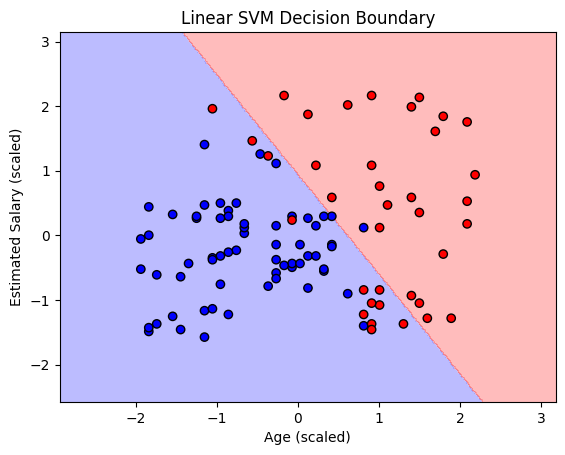

In [ ]:
# Use only relevant columns ('Age', 'EstimatedSalary') and target ('Purchased')
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# -----------------------------
# 3. Split into Train & Test
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 4. Feature Scaling (Important for SVM)
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train Linear SVM Model
# -----------------------------
svm_model = SVC(kernel='linear', C=3.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Make Predictions
# -----------------------------
y_pred = svm_model.predict(X_test_scaled)

# -----------------------------
# 7. Evaluate Accuracy & Metrics
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# -----------------------------
# 8. Plot Decision Boundary
# -----------------------------
def plot_svm_boundary(model, X_scaled, y):
    # Create grid to draw decision boundary
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_svm_boundary(svm_model, X_test_scaled, y_test)

/tmp/ipython-input-3203673253.py:23: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'contentsocial-network-ads-csv' dataset.
Accuracy: 0.93

Confusion Matrix:
[[57  6]
 [ 1 36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.86      0.97      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



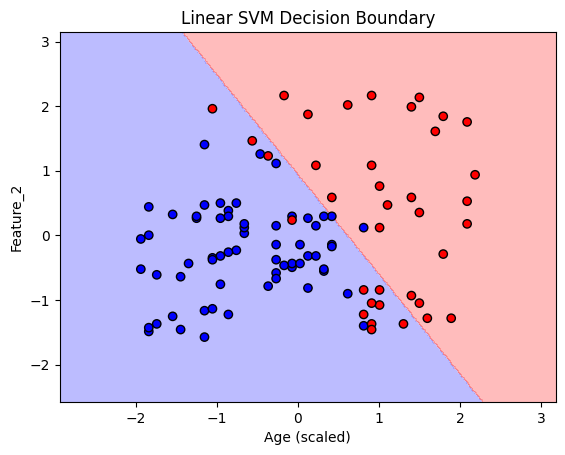

In [ ]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load the Dataset
# -----------------------------
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Social_Network_Ads.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "pranjal323/contentsocial-network-ads-csv",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)


X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# -----------------------------
# 3. Split Dataset
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# -----------------------------
# 4. Feature Scaling
# -----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 5. Train Non-Linear SVM (RBF Kernel)
# -----------------------------
svm_rbf = SVC(kernel='rbf', C=3.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# -----------------------------
# 6. Predictions
# -----------------------------
y_pred = svm_rbf.predict(X_test_scaled)

# -----------------------------
# 7. Evaluation
# -----------------------------
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(report)

# -----------------------------
# 8. Plot Decision Boundary
# -----------------------------
def plot_svm_boundary(model, X_scaled, y):
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Age (scaled)')
    plt.ylabel('Feature_2')
    plt.title('Linear SVM Decision Boundary')
    plt.show()

plot_svm_boundary(svm_model, X_test_scaled, y_test)